In [1]:
pants = ("Those are awesome!!!")


In [2]:
print(pants)

Those are awesome!!!


In [3]:
!pip install python-dotenv
!pip install yfinance
!pip install tiingo
!pip install numpy
!pip install tensorflow==1.2
!pip install hvplot

import os
import requests
import pandas as pd
import json
from dotenv import load_dotenv
import pprint

import time
import datetime
import pandas as pd
import requests
import yfinance as yf
import numpy as np
from sklearn import preprocessing
import requests
import hvplot.pandas

from numpy.random import seed
from tensorflow import random





ERROR: Could not find a version that satisfies the requirement tensorflow==1.2 (from versions: 1.13.1, 1.13.2, 1.14.0, 1.15.0, 1.15.2, 1.15.3, 1.15.4, 1.15.5, 2.0.0, 2.0.1, 2.0.2, 2.0.3, 2.0.4, 2.1.0, 2.1.1, 2.1.2, 2.1.3, 2.1.4, 2.2.0rc0, 2.2.0rc1, 2.2.0rc2, 2.2.0rc3, 2.2.0rc4, 2.2.0, 2.2.1, 2.2.2, 2.2.3, 2.3.0rc0, 2.3.0rc1, 2.3.0rc2, 2.3.0, 2.3.1, 2.3.2, 2.3.3, 2.3.4, 2.4.0rc0, 2.4.0rc1, 2.4.0rc2, 2.4.0rc3, 2.4.0rc4, 2.4.0, 2.4.1, 2.4.2, 2.4.3, 2.4.4, 2.5.0rc0, 2.5.0rc1, 2.5.0rc2, 2.5.0rc3, 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.8.0rc0, 2.8.0rc1, 2.8.0)
ERROR: No matching distribution found for tensorflow==1.2


In [4]:
TIINGO_API_KEY = os.getenv("1b545063658e8ac3669f26afd4f3439ff66adb3f")
load_dotenv()

headers = {
        'Content-Type': 'application/json'
        }
requestResponse = requests.get("https://api.tiingo.com/api/test?token=1b545063658e8ac3669f26afd4f3439ff66adb3f",
                                    headers=headers)
print(requestResponse.json())



{'message': 'You successfully sent a request'}


In [5]:
from tiingo import TiingoClient


config = {
    'api_key': '1b545063658e8ac3669f26afd4f3439ff66adb3f',
    'session': True # Reuse HTTP sessions across API calls for better performance
}

# Throughout the rest of this notebook, you'll use the "client" to interact with the Tiingo backend services.
client = TiingoClient(config)

# You can obtain cryptocurrency metadata using the following method.
# NOTE: Crypto symbol MUST be encapsulated in brackets as a Python list!

meta_data = client.get_crypto_metadata(['BTCUSD'], fmt='json')

#You can obtain top-of-book cryptocurrency quotes from the ``get_crypto_top_of_book()`` method.
# NOTE: Crypto symbol MUST be encapsulated in brackets as a Python list!

book_data = crypto_price = client.get_crypto_top_of_book(['BTCUSD'])

# You can obtain historical Cryptocurrency price quotes from the get_crypto_price_history() method.
# NOTE: Crypto symbol MUST be encapsulated in brackets as a Python list!

history_data_BTC = client.get_crypto_price_history(tickers = ['BTCUSD'], startDate='2020-1-1',
                                endDate='2022-02-22', resampleFreq='1Day')

history_data_BTC

history_data_BTC[0]['priceData']

[{'close': 7196.776429525673,
  'date': '2020-01-01T00:00:00+00:00',
  'high': 7254.0026432360855,
  'low': 7168.967988547491,
  'open': 7190.600510715096,
  'tradesDone': 244774.0,
  'volume': 23489.516384393202,
  'volumeNotional': 169048797.8561581},
 {'close': 6963.684559162969,
  'date': '2020-01-02T00:00:00+00:00',
  'high': 7208.28306447971,
  'low': 6923.5638613545425,
  'open': 7196.346028585246,
  'tradesDone': 370066.0,
  'volume': 46760.0109227101,
  'volumeNotional': 325621966.0487681},
 {'close': 7345.355820998829,
  'date': '2020-01-03T00:00:00+00:00',
  'high': 7407.114204756193,
  'low': 6870.7239929398675,
  'open': 6963.407320096487,
  'tradesDone': 628418.0,
  'volume': 92083.8730241979,
  'volumeNotional': 676388812.7384092},
 {'close': 7354.87146608714,
  'date': '2020-01-04T00:00:00+00:00',
  'high': 7404.769840598317,
  'low': 7273.229247792731,
  'open': 7346.201139148587,
  'tradesDone': 360486.0,
  'volume': 40894.0097485051,
  'volumeNotional': 300770185.433

In [6]:
# turn date into index and rename price data for each asset to make easier to concat

Historical_Crypto_BTC=pd.DataFrame(history_data_BTC[0]['priceData'])

btc_historical = Historical_Crypto_BTC.set_index('date')[['close']].rename(columns={'close':'BTC_DAILY_CLOSE'})

btc_historical

BTC_DAILY_CLOSE
date                                      
2020-01-01T00:00:00+00:00      7196.776430
2020-01-02T00:00:00+00:00      6963.684559
2020-01-03T00:00:00+00:00      7345.355821
2020-01-04T00:00:00+00:00      7354.871466
2020-01-05T00:00:00+00:00      7358.496281
...                                    ...
2022-02-18T00:00:00+00:00     39981.937395
2022-02-19T00:00:00+00:00     40089.154019
2022-02-20T00:00:00+00:00     38391.565453
2022-02-21T00:00:00+00:00     37017.579074
2022-02-22T00:00:00+00:00     38242.353621

[784 rows x 1 columns]

In [7]:

!pip install python-dateutil

pd.to_datetime(btc_historical.index).date

btc_historical.index = pd.to_datetime(btc_historical.index).date

btc_historical

BTC_DAILY_CLOSE
2020-01-01      7196.776430
2020-01-02      6963.684559
2020-01-03      7345.355821
2020-01-04      7354.871466
2020-01-05      7358.496281
...                     ...
2022-02-18     39981.937395
2022-02-19     40089.154019
2022-02-20     38391.565453
2022-02-21     37017.579074
2022-02-22     38242.353621

[784 rows x 1 columns]

In [8]:

history_data_ETH = client.get_crypto_price_history(tickers = ['ETHUSD'], startDate='2020-1-1',
                                endDate='2022-02-22', resampleFreq='1Day')

history_data_ETH

history_data_ETH[0]['priceData']

Historical_Crypto_ETH = pd.DataFrame(history_data_ETH[0]['priceData'])

Historical_Crypto_ETH

date         open  ...        close  tradesDone
0    2020-01-01T00:00:00+00:00   129.002165  ...   130.591979     90789.0
1    2020-01-02T00:00:00+00:00   130.621191  ...   127.158465    105082.0
2    2020-01-03T00:00:00+00:00   127.155827  ...   134.364470    175000.0
3    2020-01-04T00:00:00+00:00   134.401274  ...   134.216472    101504.0
4    2020-01-05T00:00:00+00:00   134.243545  ...   135.389122    125180.0
..                         ...          ...  ...          ...         ...
779  2022-02-18T00:00:00+00:00  2892.780921  ...  2779.744310   1157088.0
780  2022-02-19T00:00:00+00:00  2779.800218  ...  2764.041273    846031.0
781  2022-02-20T00:00:00+00:00  2764.106836  ...  2622.361412   1034140.0
782  2022-02-21T00:00:00+00:00  2622.479511  ...  2568.779103   1437846.0
783  2022-02-22T00:00:00+00:00  2568.691340  ...  2637.120761   1550871.0

[784 rows x 8 columns]

In [9]:

eth_historical = Historical_Crypto_ETH.set_index('date')[['close']].rename(columns={'close':'ETH_DAILY_CLOSE'})

eth_historical

pd.to_datetime(eth_historical.index).date

eth_historical.index = pd.to_datetime(eth_historical.index).date

eth_historical

ETH_DAILY_CLOSE
2020-01-01       130.591979
2020-01-02       127.158465
2020-01-03       134.364470
2020-01-04       134.216472
2020-01-05       135.389122
...                     ...
2022-02-18      2779.744310
2022-02-19      2764.041273
2022-02-20      2622.361412
2022-02-21      2568.779103
2022-02-22      2637.120761

[784 rows x 1 columns]

In [10]:

ticker =  ('SPY')
period1 = int(time.mktime(datetime.datetime(2020,1,1,23,59).timetuple()))
period2 = int(time.mktime(datetime.datetime(2022,2,22,23,59).timetuple()))
interval = '1d'

query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'
data_spy = pd.read_csv(query_string)
data_spy.head(10)

spy_daily_close = pd.DataFrame(data_spy)
spy_daily_close

Date        Open        High  ...       Close   Adj Close     Volume
0    2020-01-02  323.540009  324.890015  ...  324.869995  314.719208   59151200
1    2020-01-03  321.160004  323.640015  ...  322.410004  312.336029   77709700
2    2020-01-06  320.489990  323.730011  ...  323.640015  313.527618   55653900
3    2020-01-07  323.019989  323.540009  ...  322.730011  312.646057   40496400
4    2020-01-08  322.940002  325.779999  ...  324.450012  314.312317   68296000
..          ...         ...         ...  ...         ...         ...        ...
535  2022-02-15  443.730011  446.279999  ...  446.100006  446.100006   88659500
536  2022-02-16  443.929993  448.059998  ...  446.600006  446.600006   84863600
537  2022-02-17  443.220001  446.570007  ...  437.059998  437.059998  102259100
538  2022-02-18  437.329987  438.660004  ...  434.230011  434.230011  132454300
539  2022-02-22  431.890015  435.500000  ...  429.570007  429.570007  124391800

[540 rows x 7 columns]

In [11]:

spy_historical = spy_daily_close[['Date', 'Adj Close']].rename(columns={'Adj Close':'SPY_DAILY_CLOSE'})
spy_historical

spy_historical.set_index('Date', inplace=True)

spy_historical.index = pd.to_datetime(spy_historical.index).date

spy_historical

SPY_DAILY_CLOSE
2020-01-02       314.719208
2020-01-03       312.336029
2020-01-06       313.527618
2020-01-07       312.646057
2020-01-08       314.312317
...                     ...
2022-02-15       446.100006
2022-02-16       446.600006
2022-02-17       437.059998
2022-02-18       434.230011
2022-02-22       429.570007

[540 rows x 1 columns]

In [12]:
#Gold from yfinance
ticker =  ('GLD')
period1 = int(time.mktime(datetime.datetime(2020,1,1,23,59).timetuple()))
period2 = int(time.mktime(datetime.datetime(2022,2,22,23,59).timetuple()))
interval = '1d'

query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'

data_gld = pd.read_csv(query_string)
data_gld.head(10)

gld_daily_close = pd.DataFrame(data_gld)
gld_daily_close

gld_historical = gld_daily_close[['Date', 'Adj Close']].rename(columns={'Adj Close':'GLD_DAILY_CLOSE'})
gld_historical

gld_historical.set_index('Date', inplace=True)

gld_historical.index = pd.to_datetime(gld_historical.index).date

gld_historical


GLD_DAILY_CLOSE
2020-01-02       143.949997
2020-01-03       145.860001
2020-01-06       147.389999
2020-01-07       147.970001
2020-01-08       146.860001
...                     ...
2022-02-15       173.080002
2022-02-16       174.860001
2022-02-17       177.250000
2022-02-18       177.119995
2022-02-22       177.490005

[540 rows x 1 columns]

In [13]:
combined_frame = pd.concat([spy_historical, gld_historical, eth_historical, btc_historical], axis=1, join="inner")
combined_frame 

scaler = preprocessing.MinMaxScaler()
names = combined_frame.columns
d = scaler.fit_transform(combined_frame)
scaled_combined_frame = pd.DataFrame(d, columns=names)
scaled_combined_frame.head()


SPY_DAILY_CLOSE  GLD_DAILY_CLOSE  ETH_DAILY_CLOSE  BTC_DAILY_CLOSE
0         0.374210         0.105819         0.003972         0.034019
1         0.365060         0.140018         0.005505         0.040106
2         0.369635         0.167413         0.007588         0.046704
3         0.366251         0.177798         0.007315         0.052931
4         0.372648         0.157923         0.006860         0.051397

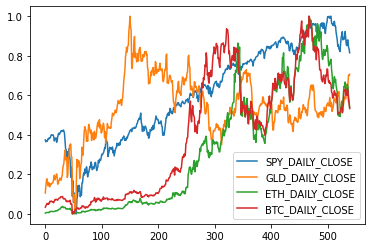

In [14]:
scaled_combined_frame.plot()

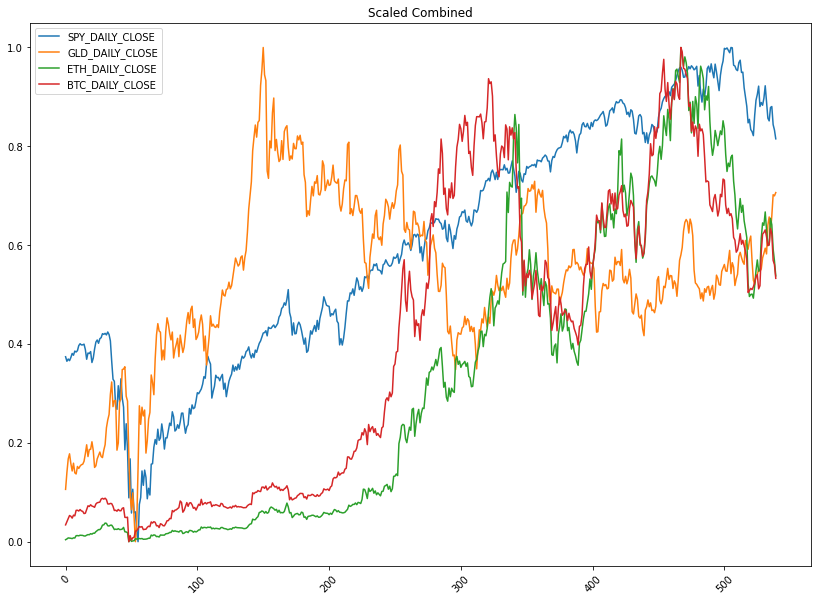

In [15]:
scaled_combined_frame.plot(figsize=(14, 10), title='Scaled Combined', rot=45);

In [16]:
#  Create the Features X and Target y Data
def window_data(df, window, feature_col_number, target_col_number):
    """
    This function accepts the column number for the features (X) and the target (y).
    It chunks the data up with a rolling window of Xt - window to predict Xt.
    It returns two numpy arrays of X and y.
    """
    X = []
    y = []
    for i in range(len(df) - window):
        features = df.iloc[i : (i + window), feature_col_number]
        target = df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)


In [17]:
# -----------------Starting spy_historical code here???? (cause function above is generic to all??? -JE)

In [18]:
spy_historical['Next Day Close'] = spy_historical.SPY_DAILY_CLOSE.shift(-1)

In [19]:
spy_historical = spy_historical.dropna()
spy_historical

SPY_DAILY_CLOSE  Next Day Close
2020-01-02       314.719208      312.336029
2020-01-03       312.336029      313.527618
2020-01-06       313.527618      312.646057
2020-01-07       312.646057      314.312317
2020-01-08       314.312317      316.443512
...                     ...             ...
2022-02-14       439.019989      446.100006
2022-02-15       446.100006      446.600006
2022-02-16       446.600006      437.059998
2022-02-17       437.059998      434.230011
2022-02-18       434.230011      429.570007

[539 rows x 2 columns]

In [20]:
# Define the window size
window_size = 50

# Set the index of the feature and target columns
feature_column = 0
target_column = 1

# Create the features (X) and target (y) data using the window_data() function.
X, y = window_data(spy_historical, window_size, feature_column, target_column)


# Print a few sample values from X and y
print (f"X sample values:\n{X[:3]} \n")
print (f"y sample values:\n{y[:3]}")

X sample values:
[[314.719208 312.336029 313.527618 312.646057 314.312317 316.443512
  315.532959 317.702972 317.218628 317.935486 320.58017  321.577972
  320.948273 320.98703  321.355194 318.497345 313.391998 316.676086
  316.41452  317.441406 311.677307 313.992645 318.778259 322.459534
  323.544495 321.820129 324.222687 324.784607 326.877045 326.52829
  327.051453 326.208618 327.768311 326.421783 323.06015  312.345734
  302.880981 301.766968 288.214081 287.003174 299.43222  290.858795
  303.084442 293.009399 288.165619 265.661469 279.408081 265.787384
  240.357635 260.904907]
 [312.336029 313.527618 312.646057 314.312317 316.443512 315.532959
  317.702972 317.218628 317.935486 320.58017  321.577972 320.948273
  320.98703  321.355194 318.497345 313.391998 316.676086 316.41452
  317.441406 311.677307 313.992645 318.778259 322.459534 323.544495
  321.820129 324.222687 324.784607 326.877045 326.52829  327.051453
  326.208618 327.768311 326.421783 323.06015  312.345734 302.880981
  301.76

In [21]:
window_size

50

In [22]:
# Split Data Between Training and Testing Sets
# Manually splitting the data
split = int(0.7 * len(X))

X_train = X[: split]
X_test = X[split:]

y_train = y[: split]
y_test = y[split:]

In [23]:
X

array([[314.719208, 312.336029, 313.527618, ..., 265.787384, 240.357635,
        260.904907],
       [312.336029, 313.527618, 312.646057, ..., 240.357635, 260.904907,
        232.355682],
       [313.527618, 312.646057, 314.312317, ..., 260.904907, 232.355682,
        244.901062],
       ...,
       [457.183807, 466.640594, 467.876221, ..., 440.459991, 439.019989,
        446.100006],
       [466.640594, 467.876221, 464.717346, ..., 439.019989, 446.100006,
        446.600006],
       [467.876221, 464.717346, 469.091949, ..., 446.100006, 446.600006,
        437.059998]])

In [24]:
# Scale Data with MinMaxScaler
# Importing the MinMaxScaler from sklearn
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the MinMaxScaler object with the features data X
scaler.fit(X_train)

# Scale the features training and testing sets
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Fit the MinMaxScaler object with the target data Y
scaler.fit(y_train)

# Scale the target training and testing sets
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

In [25]:
#  Reshape Features Data for the LSTM Model
# Reshape the features data
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Print some sample data after reshaping the datasets
print (f"X_train sample values:\n{X_train[:3]} \n")
print (f"X_test sample values:\n{X_test[:3]}")

X_train sample values:
[[[0.48568108]
  [0.47380543]
  [0.47974325]
  [0.47535033]
  [0.48365349]
  [0.49427348]
  [0.48973609]
  [0.50054951]
  [0.49813597]
  [0.50170815]
  [0.51488691]
  [0.51985907]
  [0.51672121]
  [0.51691434]
  [0.51874895]
  [0.50450796]
  [0.47906744]
  [0.4942619 ]
  [0.49296156]
  [0.49806656]
  [0.46941127]
  [0.47854268]
  [0.50050001]
  [0.5162543 ]
  [0.5215783 ]
  [0.51311668]
  [0.52490625]
  [0.52766365]
  [0.53793144]
  [0.53622006]
  [0.53878727]
  [0.53147347]
  [0.53516611]
  [0.52646764]
  [0.50969446]
  [0.45729279]
  [0.40716765]
  [0.39572097]
  [0.33226148]
  [0.32547139]
  [0.38346904]
  [0.34178361]
  [0.39570591]
  [0.34925683]
  [0.3269255 ]
  [0.22317436]
  [0.28655052]
  [0.22375486]
  [0.1065158 ]
  [0.20124513]]

 [[0.47380543]
  [0.47974325]
  [0.47535033]
  [0.48365349]
  [0.49427348]
  [0.48973609]
  [0.50054951]
  [0.49813597]
  [0.50170815]
  [0.51488691]
  [0.51985907]
  [0.51672121]
  [0.51691434]
  [0.51874895]
  [0.50450796]


In [26]:
# Build and Train the LSTM RNN
# Importing required Keras modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [27]:
# Create the LSTM RNN Model Structure
# Define the LSTM RNN model.
model = Sequential()

# Initial model setup
number_units = 30
dropout_fraction = 0.2

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))

# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))

# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))

# Output layer
model.add(Dense(1))

In [28]:
#  Compile the LSTM RNN Model
# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

In [29]:
# Show the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 30)            3840      
                                                                 
 dropout (Dropout)           (None, 50, 30)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50, 30)            7320      
                                                                 
 dropout_1 (Dropout)         (None, 50, 30)            0         
                                                                 
 lstm_2 (LSTM)               (None, 30)                7320      
                                                                 
 dropout_2 (Dropout)         (None, 30)                0         
                                                                 
 dense (Dense)               (None, 1)                 3

In [30]:
#  Train the Model
# Train the model
model.fit(X_train, y_train, epochs=100, shuffle=False, batch_size=90, verbose=1)

Epoch 1/100
4/4 [==============================] - 12s 150ms/step - loss: 0.3736
Epoch 2/100
4/4 [==============================] - 1s 160ms/step - loss: 0.1951
Epoch 3/100
4/4 [==============================] - 1s 167ms/step - loss: 0.0461
Epoch 4/100
4/4 [==============================] - 1s 140ms/step - loss: 0.0388
Epoch 5/100
4/4 [==============================] - 1s 125ms/step - loss: 0.0500
Epoch 6/100
4/4 [==============================] - 0s 120ms/step - loss: 0.0312
Epoch 7/100
4/4 [==============================] - 1s 201ms/step - loss: 0.0314
Epoch 8/100
4/4 [==============================] - 1s 191ms/step - loss: 0.0279
Epoch 9/100
4/4 [==============================] - 1s 149ms/step - loss: 0.0200
Epoch 10/100
4/4 [==============================] - 1s 135ms/step - loss: 0.0214
Epoch 11/100
4/4 [==============================] - 1s 138ms/step - loss: 0.0237
Epoch 12/100
4/4 [==============================] - 0s 120ms/step - loss: 0.0229
Epoch 13/100
4/4 [==================

In [31]:
# Model Performance
# Evaluate the model

model.evaluate(X_test, y_test, verbose=0)

0.002423930214717984

In [32]:
# Make Predictions
# Make predictions using the testing data X_test
predicted = model.predict(X_test)

In [33]:
# Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

In [34]:
#  Plotting Predicted Vs. Real Prices
 # Create a DataFrame of Real and Predicted values
stocks = pd.DataFrame({
    "SPY Actual": real_prices.ravel(),
    "SPY Predicted": predicted_prices.ravel()
}, index = spy_historical.index[-len(real_prices): ]) 

# Show the DataFrame's head
stocks.head()

SPY Actual  SPY Predicted
2021-07-23  438.072571     434.290894
2021-07-26  436.076019     434.614838
2021-07-27  435.897217     434.986816
2021-07-28  437.705048     435.394867
2021-07-29  435.579346     435.831329

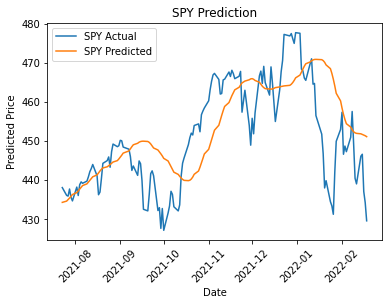

In [35]:
 # Plot the real vs predicted prices as a line chart
stocks.plot(title="SPY Prediction", xlabel="Date", ylabel="Predicted Price",rot=45);

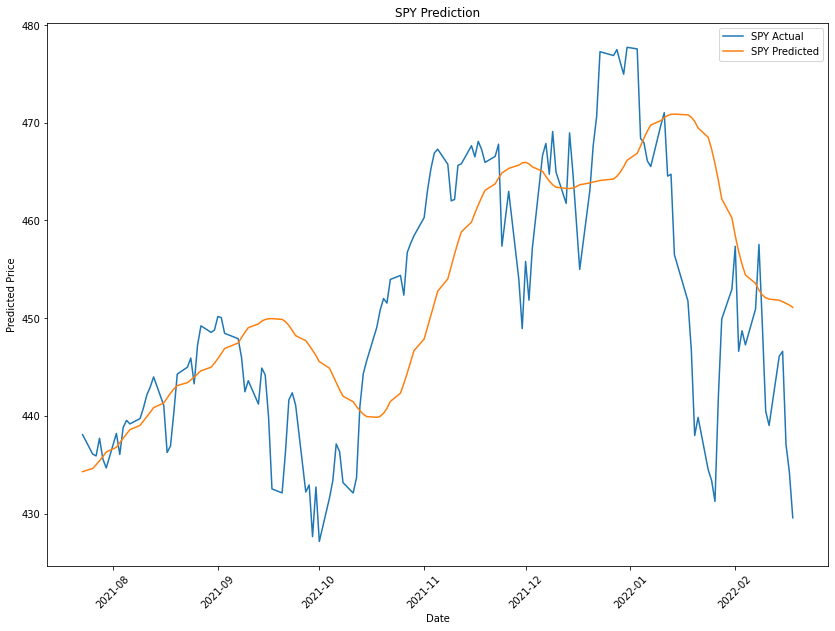

In [36]:
stocks.plot(figsize=(14, 10), title="SPY Prediction", xlabel="Date", ylabel="Predicted Price",rot=45);

In [37]:
combined_frame 

SPY_DAILY_CLOSE  GLD_DAILY_CLOSE  ETH_DAILY_CLOSE  BTC_DAILY_CLOSE
2020-01-02       314.719208       143.949997       127.158465      6963.684559
2020-01-03       312.336029       145.860001       134.364470      7345.355821
2020-01-06       313.527618       147.389999       144.157730      7759.080472
2020-01-07       312.646057       147.970001       142.877136      8149.535123
2020-01-08       314.312317       146.860001       140.734612      8053.347987
...                     ...              ...              ...              ...
2022-02-15       446.100006       173.080002      3184.668578     44556.618133
2022-02-16       446.600006       174.860001      3123.327348     43881.746655
2022-02-17       437.059998       177.250000      2892.750980     40526.510616
2022-02-18       434.230011       177.119995      2779.744310     39981.937395
2022-02-22       429.570007       177.490005      2637.120761     38242.353621

[540 rows x 4 columns]

In [38]:
 
# load dataset
dataset = combined_frame 
values = dataset.values


In [39]:
dataset

SPY_DAILY_CLOSE  GLD_DAILY_CLOSE  ETH_DAILY_CLOSE  BTC_DAILY_CLOSE
2020-01-02       314.719208       143.949997       127.158465      6963.684559
2020-01-03       312.336029       145.860001       134.364470      7345.355821
2020-01-06       313.527618       147.389999       144.157730      7759.080472
2020-01-07       312.646057       147.970001       142.877136      8149.535123
2020-01-08       314.312317       146.860001       140.734612      8053.347987
...                     ...              ...              ...              ...
2022-02-15       446.100006       173.080002      3184.668578     44556.618133
2022-02-16       446.600006       174.860001      3123.327348     43881.746655
2022-02-17       437.059998       177.250000      2892.750980     40526.510616
2022-02-18       434.230011       177.119995      2779.744310     39981.937395
2022-02-22       429.570007       177.490005      2637.120761     38242.353621

[540 rows x 4 columns]

In [40]:
# --------------------------------------------------------Starting Model for gld_historical here 


In [41]:
gld_historical

GLD_DAILY_CLOSE
2020-01-02       143.949997
2020-01-03       145.860001
2020-01-06       147.389999
2020-01-07       147.970001
2020-01-08       146.860001
...                     ...
2022-02-15       173.080002
2022-02-16       174.860001
2022-02-17       177.250000
2022-02-18       177.119995
2022-02-22       177.490005

[540 rows x 1 columns]

In [42]:
gld_historical['Next Day Close'] = gld_historical.GLD_DAILY_CLOSE.shift(-1)

In [43]:
gld_historical = gld_historical.dropna()
gld_historical

GLD_DAILY_CLOSE  Next Day Close
2020-01-02       143.949997      145.860001
2020-01-03       145.860001      147.389999
2020-01-06       147.389999      147.970001
2020-01-07       147.970001      146.860001
2020-01-08       146.860001      146.029999
...                     ...             ...
2022-02-14       174.740005      173.080002
2022-02-15       173.080002      174.860001
2022-02-16       174.860001      177.250000
2022-02-17       177.250000      177.119995
2022-02-18       177.119995      177.490005

[539 rows x 2 columns]

In [44]:
# Define the window size
window_size = 50

# Set the index of the feature and target columns
feature_column = 0
target_column = 1

# Create the features (X) and target (y) data using the window_data() function.
X, y = window_data(gld_historical, window_size, feature_column, target_column)


# Print a few sample values from X and y
print (f"X sample values:\n{X[:3]} \n")
print (f"y sample values:\n{y[:3]}")

X sample values:
[[143.949997 145.860001 147.389999 147.970001 146.860001 146.029999
  146.910004 145.820007 145.690002 146.539993 146.309998 146.580002
  146.740005 146.789993 147.119995 147.979996 148.990005 147.660004
  148.460007 148.470001 149.330002 148.360001 146.429993 146.610001
  147.399994 147.789993 148.169998 147.660004 147.539993 148.380005
  149.       150.910004 151.789993 152.410004 154.699997 156.089996
  153.300003 153.970001 154.       148.380005 149.199997 153.889999
  154.160004 157.490005 157.550003 157.809998 154.479996 153.929993
  147.789993 143.279999]
 [145.860001 147.389999 147.970001 146.860001 146.029999 146.910004
  145.820007 145.690002 146.539993 146.309998 146.580002 146.740005
  146.789993 147.119995 147.979996 148.990005 147.660004 148.460007
  148.470001 149.330002 148.360001 146.429993 146.610001 147.399994
  147.789993 148.169998 147.660004 147.539993 148.380005 149.
  150.910004 151.789993 152.410004 154.699997 156.089996 153.300003
  153.970001

In [45]:
# Split Data Between Training and Testing Sets
# Manually splitting the data
split = int(0.7 * len(X))

X_train = X[: split]
X_test = X[split:]

y_train = y[: split]
y_test = y[split:]

In [46]:
# Scale Data with MinMaxScaler
# Importing the MinMaxScaler from sklearn
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the MinMaxScaler object with the features data X
scaler.fit(X_train)

# Scale the features training and testing sets
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Fit the MinMaxScaler object with the target data Y
scaler.fit(y_train)

# Scale the target training and testing sets
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

In [47]:
#  Reshape Features Data for the LSTM Model
# Reshape the features data
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Print some sample data after reshaping the datasets
print (f"X_train sample values:\n{X_train[:3]} \n")
print (f"X_test sample values:\n{X_test[:3]}")

X_train sample values:
[[[0.10581922]
  [0.14001803]
  [0.1674128 ]
  [0.1777978 ]
  [0.15792313]
  [0.14306186]
  [0.15881844]
  [0.13930194]
  [0.13697418]
  [0.15219336]
  [0.14807528]
  [0.15290972]
  [0.15577459]
  [0.15666963]
  [0.16257835]
  [0.17797676]
  [0.19606107]
  [0.17224727]
  [0.1865714 ]
  [0.18675035]
  [0.20214875]
  [0.18478079]
  [0.1502238 ]
  [0.15344686]
  [0.16759176]
  [0.17457474]
  [0.18137876]
  [0.17224727]
  [0.17009846]
  [0.18513896]
  [0.19624003]
  [0.23043885]
  [0.24619514]
  [0.2572965 ]
  [0.29829905]
  [0.32318713]
  [0.27323202]
  [0.2852284 ]
  [0.28576554]
  [0.18513896]
  [0.199821  ]
  [0.28379596]
  [0.28863043]
  [0.34825443]
  [0.3493287 ]
  [0.35398394]
  [0.29435991]
  [0.28451206]
  [0.17457474]
  [0.09382284]]

 [[0.14001803]
  [0.1674128 ]
  [0.1777978 ]
  [0.15792313]
  [0.14306186]
  [0.15881844]
  [0.13930194]
  [0.13697418]
  [0.15219336]
  [0.14807528]
  [0.15290972]
  [0.15577459]
  [0.15666963]
  [0.16257835]
  [0.17797676]


In [48]:
# WE ALREADY DID THIS ABOVE ... JUST BEING CONSISTENT -JE
# Build and Train the LSTM RNN
# Importing required Keras modules
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Dropout

In [49]:
# Create the LSTM RNN Model Structure
# Define the LSTM RNN model.
model = Sequential()

# Initial model setup
number_units = 30
dropout_fraction = 0.2

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))

# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))

# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))

# Output layer
model.add(Dense(1))

In [50]:
#  Compile the LSTM RNN Model
# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

In [51]:
# Show the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 50, 30)            3840      
                                                                 
 dropout_3 (Dropout)         (None, 50, 30)            0         
                                                                 
 lstm_4 (LSTM)               (None, 50, 30)            7320      
                                                                 
 dropout_4 (Dropout)         (None, 50, 30)            0         
                                                                 
 lstm_5 (LSTM)               (None, 30)                7320      
                                                                 
 dropout_5 (Dropout)         (None, 30)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                

In [52]:
#  Train the Model
# Train the model
model.fit(X_train, y_train, epochs=100, shuffle=False, batch_size=90, verbose=1)

Epoch 1/100
4/4 [==============================] - 6s 74ms/step - loss: 0.2939
Epoch 2/100
4/4 [==============================] - 0s 73ms/step - loss: 0.1558
Epoch 3/100
4/4 [==============================] - 0s 72ms/step - loss: 0.0343
Epoch 4/100
4/4 [==============================] - 0s 75ms/step - loss: 0.0526
Epoch 5/100
4/4 [==============================] - 0s 70ms/step - loss: 0.0240
Epoch 6/100
4/4 [==============================] - 0s 82ms/step - loss: 0.0217
Epoch 7/100
4/4 [==============================] - 0s 72ms/step - loss: 0.0262
Epoch 8/100
4/4 [==============================] - 0s 74ms/step - loss: 0.0204
Epoch 9/100
4/4 [==============================] - 0s 79ms/step - loss: 0.0187
Epoch 10/100
4/4 [==============================] - 0s 74ms/step - loss: 0.0193
Epoch 11/100
4/4 [==============================] - 0s 72ms/step - loss: 0.0168
Epoch 12/100
4/4 [==============================] - 0s 77ms/step - loss: 0.0151
Epoch 13/100
4/4 [==============================]

In [53]:
# Model Performance
# Evaluate the model
model.evaluate(X_test, y_test, verbose=0)

0.0028499537147581577

In [54]:
# Make Predictions
# Make predictions using the testing data X_test
predicted = model.predict(X_test)

In [55]:
# Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

In [56]:
#  Plotting Predicted Vs. Real Prices
 # Create a DataFrame of Real and Predicted values

gold = pd.DataFrame({
    "Gold Actual": real_prices.ravel(),
    "Gold Predicted": predicted_prices.ravel()
}, index = gld_historical.index[-len(real_prices): ]) 

# Show the DataFrame's head
gold.head()

Gold Actual  Gold Predicted
2021-07-23   168.160004      169.916183
2021-07-26   168.440002      170.022400
2021-07-27   169.289993      170.044144
2021-07-28   171.169998      170.000076
2021-07-29   169.820007      169.925842

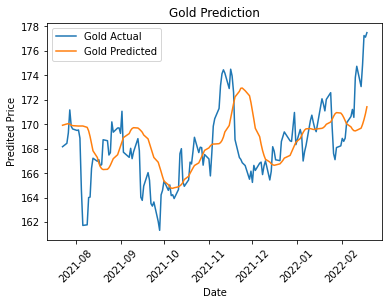

In [57]:
# Plot the real vs predicted prices as a line chart
# STILL THINKING IT SHOULD BE STOCKS2 OR SOMETHING SO IT DOESN'T OVERWRITE ABOVE FOR SPY?
gold.plot(title="Gold Prediction",xlabel="Date",ylabel="Predited Price", rot=45);

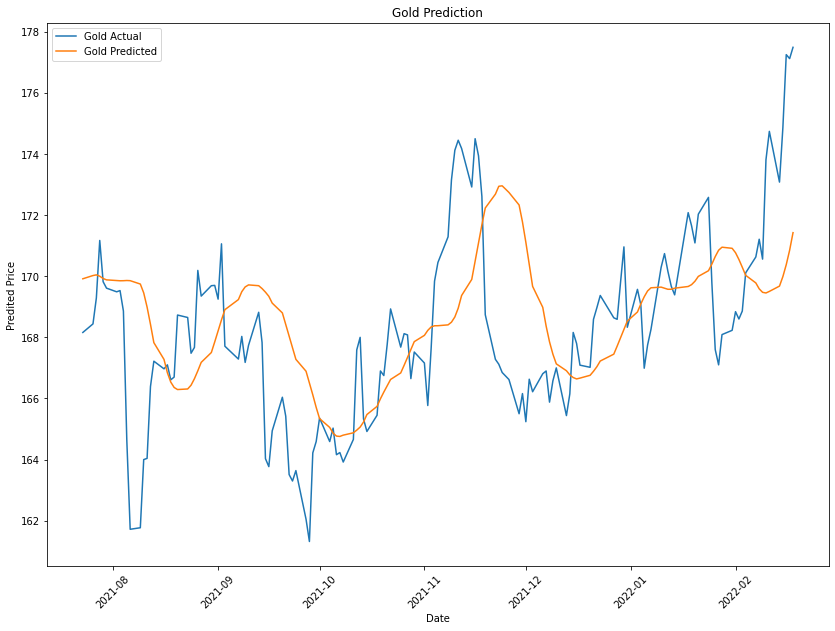

In [58]:
gold.plot(figsize=(14, 10), title="Gold Prediction",xlabel="Date",ylabel="Predited Price", rot=45);

In [59]:
# --------------------------------------------------------Starting Model for ETH_DAILY_CLOSE here (STILL NEEDS REVIEW ON ALL VARIABLES!!!!  but I think I got it???)

In [60]:
eth_historical

ETH_DAILY_CLOSE
2020-01-01       130.591979
2020-01-02       127.158465
2020-01-03       134.364470
2020-01-04       134.216472
2020-01-05       135.389122
...                     ...
2022-02-18      2779.744310
2022-02-19      2764.041273
2022-02-20      2622.361412
2022-02-21      2568.779103
2022-02-22      2637.120761

[784 rows x 1 columns]

In [61]:
eth_historical['Next Day Close'] = eth_historical.ETH_DAILY_CLOSE.shift(-1)

In [62]:
eth_historical = eth_historical.dropna()
eth_historical

ETH_DAILY_CLOSE  Next Day Close
2020-01-01       130.591979      127.158465
2020-01-02       127.158465      134.364470
2020-01-03       134.364470      134.216472
2020-01-04       134.216472      135.389122
2020-01-05       135.389122      144.157730
...                     ...             ...
2022-02-17      2892.750980     2779.744310
2022-02-18      2779.744310     2764.041273
2022-02-19      2764.041273     2622.361412
2022-02-20      2622.361412     2568.779103
2022-02-21      2568.779103     2637.120761

[783 rows x 2 columns]

In [63]:
# Define the window size
window_size = 50

# Set the index of the feature and target columns
feature_column = 0
target_column = 1

# Create the features (X) and target (y) data using the window_data() function.
X, y = window_data(eth_historical, window_size, feature_column, target_column)


# Print a few sample values from X and y
print (f"X sample values:\n{X[:3]} \n")
print (f"y sample values:\n{y[:3]}")

X sample values:
[[130.5919791  127.15846531 134.36447012 134.21647191 135.38912228
  144.15773029 142.8771358  140.7346123  137.7398682  144.83539979
  142.41693477 146.51060801 143.56147391 165.57809796 166.33775761
  164.14197536 169.79751327 174.0804766  166.86178806 166.83901123
  169.42940992 168.02633103 162.77430804 162.58644543 160.37608485
  167.83431384 170.07947236 175.73431339 174.3377627  184.66201008
  179.92622755 183.65144593 188.4719921  189.25886799 188.77630395
  203.82049288 213.07060622 223.27907582 223.06873345 228.52484341
  222.91407117 237.0071774  265.83279122 268.33688438 285.33103229
  264.89552937 258.94730437 265.96803488 282.70752949 259.7998157 ]
 [127.15846531 134.36447012 134.21647191 135.38912228 144.15773029
  142.8771358  140.7346123  137.7398682  144.83539979 142.41693477
  146.51060801 143.56147391 165.57809796 166.33775761 164.14197536
  169.79751327 174.0804766  166.86178806 166.83901123 169.42940992
  168.02633103 162.77430804 162.58644543 160

In [64]:
# Split Data Between Training and Testing Sets
# Manually splitting the data
split = int(0.7 * len(X))

X_train = X[: split]
X_test = X[split:]

y_train = y[: split]
y_test = y[split:]

In [65]:
# Scale Data with MinMaxScaler
# Importing the MinMaxScaler from sklearn
# from sklearn.preprocessing import MinMaxScaler  ------hashed out because it's already done above

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the MinMaxScaler object with the features data X
scaler.fit(X_train)

# Scale the features training and testing sets
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Fit the MinMaxScaler object with the target data Y
scaler.fit(y_train)

# Scale the target training and testing sets
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

In [66]:
#  Reshape Features Data for the LSTM Model
# Reshape the features data
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Print some sample data after reshaping the datasets
print (f"X_train sample values:\n{X_train[:3]} \n")
print (f"X_test sample values:\n{X_test[:3]}")

X_train sample values:
[[[0.00543966]
  [0.00459467]
  [0.00636808]
  [0.00633166]
  [0.00662025]
  [0.00877822]
  [0.00846306]
  [0.00793578]
  [0.00719877]
  [0.00894499]
  [0.00834981]
  [0.00935727]
  [0.00863148]
  [0.01404981]
  [0.01423676]
  [0.01369637]
  [0.01508821]
  [0.01614226]
  [0.01436572]
  [0.01436012]
  [0.01499762]
  [0.01465232]
  [0.01335979]
  [0.01331356]
  [0.01276958]
  [0.01460507]
  [0.0151576 ]
  [0.01654927]
  [0.01620557]
  [0.01874639]
  [0.01758091]
  [0.01849769]
  [0.01968403]
  [0.01987768]
  [0.01975892]
  [0.02346132]
  [0.02573779]
  [0.02825011]
  [0.02819835]
  [0.02954111]
  [0.02816029]
  [0.03162862]
  [0.03872265]
  [0.03933891]
  [0.0435212 ]
  [0.03849199]
  [0.03702812]
  [0.03875594]
  [0.04287555]
  [0.03723793]]

 [[0.00459467]
  [0.00636808]
  [0.00633166]
  [0.00662025]
  [0.00877822]
  [0.00846306]
  [0.00793578]
  [0.00719877]
  [0.00894499]
  [0.00834981]
  [0.00935727]
  [0.00863148]
  [0.01404981]
  [0.01423676]
  [0.01369637]


In [67]:
# WE ALREADY DID THIS ABOVE ... JUST BEING CONSISTENT -JE
# Build and Train the LSTM RNN
# Importing required Keras modules
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Dropout

In [68]:
# Create the LSTM RNN Model Structure
# Define the LSTM RNN model.
model = Sequential()

# Initial model setup
number_units = 30
dropout_fraction = 0.2

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))

# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))

# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))

# Output layer
model.add(Dense(1))

In [69]:
#  Compile the LSTM RNN Model
# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

In [70]:
# Show the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 50, 30)            3840      
                                                                 
 dropout_6 (Dropout)         (None, 50, 30)            0         
                                                                 
 lstm_7 (LSTM)               (None, 50, 30)            7320      
                                                                 
 dropout_7 (Dropout)         (None, 50, 30)            0         
                                                                 
 lstm_8 (LSTM)               (None, 30)                7320      
                                                                 
 dropout_8 (Dropout)         (None, 30)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                

In [71]:
#  Train the Model
# Train the model
model.fit(X_train, y_train, epochs=100, shuffle=False, batch_size=90, verbose=1)

Epoch 1/100
6/6 [==============================] - 6s 77ms/step - loss: 0.0521
Epoch 2/100
6/6 [==============================] - 0s 74ms/step - loss: 0.0137
Epoch 3/100
6/6 [==============================] - 0s 73ms/step - loss: 0.0202
Epoch 4/100
6/6 [==============================] - 0s 74ms/step - loss: 0.0131
Epoch 5/100
6/6 [==============================] - 0s 74ms/step - loss: 0.0112
Epoch 6/100
6/6 [==============================] - 0s 83ms/step - loss: 0.0074
Epoch 7/100
6/6 [==============================] - 0s 74ms/step - loss: 0.0068
Epoch 8/100
6/6 [==============================] - 0s 75ms/step - loss: 0.0056
Epoch 9/100
6/6 [==============================] - 0s 74ms/step - loss: 0.0069
Epoch 10/100
6/6 [==============================] - 0s 83ms/step - loss: 0.0069
Epoch 11/100
6/6 [==============================] - 0s 73ms/step - loss: 0.0059
Epoch 12/100
6/6 [==============================] - 0s 74ms/step - loss: 0.0055
Epoch 13/100
6/6 [==============================]

In [72]:
# Model Performance
# Evaluate the model
model.evaluate(X_test, y_test, verbose=0)

0.02386416308581829

In [73]:
# Make Predictions
# Make predictions using the testing data X_test
predicted = model.predict(X_test)

In [74]:
# Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

In [75]:
#  Plotting Predicted Vs. Real Prices
 # Create a DataFrame of Real and Predicted values
 
ethereum = pd.DataFrame({
    "ETH Actual": real_prices.ravel(),
    "ETH Predicted": predicted_prices.ravel()
}, index = eth_historical.index[-len(real_prices): ]) 

# Show the DataFrame's head
ethereum.head()

ETH Actual  ETH Predicted
2021-07-17  1891.464803    2158.847900
2021-07-18  1818.694676    2128.901611
2021-07-19  1786.324923    2102.435303
2021-07-20  1995.530504    2077.974365
2021-07-21  2024.617184    2054.738770

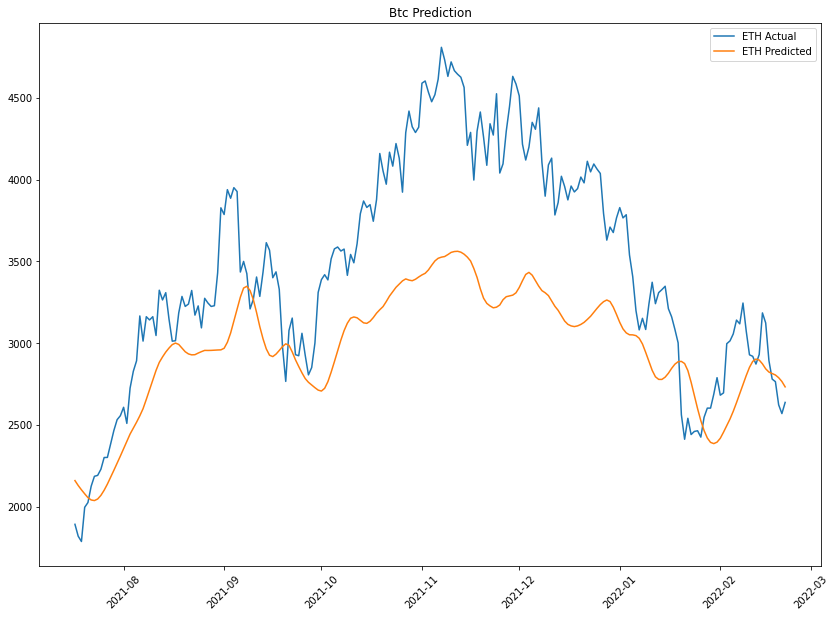

In [76]:
# Plot the real vs predicted prices as a line chart

ethereum.plot(figsize=(14, 10), title='ETH Prediction', rot=45);

In [77]:
#------------------------------------------------------------ NOW btc_historical time

In [78]:
btc_historical['Next Day Close'] = btc_historical.BTC_DAILY_CLOSE.shift(-1)

In [79]:
btc_historical = btc_historical.dropna()
btc_historical

BTC_DAILY_CLOSE  Next Day Close
2020-01-01      7196.776430     6963.684559
2020-01-02      6963.684559     7345.355821
2020-01-03      7345.355821     7354.871466
2020-01-04      7354.871466     7358.496281
2020-01-05      7358.496281     7759.080472
...                     ...             ...
2022-02-17     40526.510616    39981.937395
2022-02-18     39981.937395    40089.154019
2022-02-19     40089.154019    38391.565453
2022-02-20     38391.565453    37017.579074
2022-02-21     37017.579074    38242.353621

[783 rows x 2 columns]

In [80]:
# Define the window size
window_size = 50

# Set the index of the feature and target columns
feature_column = 0
target_column = 1

# Create the features (X) and target (y) data using the window_data() function.
X, y = window_data(btc_historical, window_size, feature_column, target_column)


# Print a few sample values from X and y
print (f"X sample values:\n{X[:3]} \n")
print (f"y sample values:\n{y[:3]}")

X sample values:
[[ 7196.77642953  6963.68455916  7345.355821    7354.87146609
   7358.49628102  7759.08047172  8149.53512287  8053.34798736
   7817.22126824  8195.80728733  8019.63523272  8183.75432766
   8108.36327929  8807.33433935  8818.48721104  8719.26225523
   8907.71967768  8910.84602677  8700.5933604   8640.13257848
   8733.24731624  8677.80543616  8400.57449636  8437.2725853
   8339.46752166  8611.8739477   8906.44135584  9380.02051517
   9298.86807256  9511.37860987  9350.8327699   9385.56221367
   9332.71865477  9291.65367068  9192.4269511   9612.31935025
   9767.80543275  9812.29222012  9894.98652011 10154.53120288
   9851.71976365 10234.71087324 10332.01140272 10228.9940531
  10347.63343262  9905.42654053  9926.28427871  9692.20976042
  10170.96637038  9625.82539415]
 [ 6963.68455916  7345.355821    7354.87146609  7358.49628102
   7759.08047172  8149.53512287  8053.34798736  7817.22126824
   8195.80728733  8019.63523272  8183.75432766  8108.36327929
   8807.33433935  8818

In [81]:
# Split Data Between Training and Testing Sets
# Manually splitting the data
split = int(0.7 * len(X))

X_train = X[: split]
X_test = X[split:]

y_train = y[: split]
y_test = y[split:]

In [82]:
# Scale Data with MinMaxScaler
# Importing the MinMaxScaler from sklearn
# from sklearn.preprocessing import MinMaxScaler  ------hashed out because it's already done above

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the MinMaxScaler object with the features data X
scaler.fit(X_train)

# Scale the features training and testing sets
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Fit the MinMaxScaler object with the target data Y
scaler.fit(y_train)

# Scale the target training and testing sets
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

In [83]:
#  Reshape Features Data for the LSTM Model
# Reshape the features data
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Print some sample data after reshaping the datasets
print (f"X_train sample values:\n{X_train[:3]} \n")
print (f"X_test sample values:\n{X_test[:3]}")

X_train sample values:
[[[0.04027801]
  [0.03631012]
  [0.04280725]
  [0.04296923]
  [0.04303094]
  [0.04985003]
  [0.05649668]
  [0.0548593 ]
  [0.05083975]
  [0.05728436]
  [0.05428541]
  [0.05707919]
  [0.05579582]
  [0.0676943 ]
  [0.06788415]
  [0.06619506]
  [0.06940314]
  [0.06945636]
  [0.06587726]
  [0.06484805]
  [0.06643313]
  [0.06548935]
  [0.06077008]
  [0.06139479]
  [0.05972987]
  [0.064367  ]
  [0.06938138]
  [0.07744305]
  [0.0760616 ]
  [0.07967914]
  [0.07694619]
  [0.07753739]
  [0.07663784]
  [0.0759388 ]
  [0.07424967]
  [0.08139744]
  [0.08404426]
  [0.08480155]
  [0.08620924]
  [0.09062743]
  [0.08547272]
  [0.09199232]
  [0.09364865]
  [0.091895  ]
  [0.09391458]
  [0.08638696]
  [0.08674202]
  [0.0827574 ]
  [0.09090721]
  [0.08162735]]

 [[0.03631012]
  [0.04280725]
  [0.04296923]
  [0.04303094]
  [0.04985003]
  [0.05649668]
  [0.0548593 ]
  [0.05083975]
  [0.05728436]
  [0.05428541]
  [0.05707919]
  [0.05579582]
  [0.0676943 ]
  [0.06788415]
  [0.06619506]


In [84]:
# WE ALREADY DID THIS ABOVE ... JUST BEING CONSISTENT -JE
# Build and Train the LSTM RNN
# Importing required Keras modules
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Dropout

In [85]:
# Create the LSTM RNN Model Structure
# Define the LSTM RNN model.
model = Sequential()

# Initial model setup
number_units = 30
dropout_fraction = 0.2

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))

# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))

# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))

# Output layer
model.add(Dense(1))

In [86]:
#  Compile the LSTM RNN Model
# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

In [87]:
# Show the model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 50, 30)            3840      
                                                                 
 dropout_9 (Dropout)         (None, 50, 30)            0         
                                                                 
 lstm_10 (LSTM)              (None, 50, 30)            7320      
                                                                 
 dropout_10 (Dropout)        (None, 50, 30)            0         
                                                                 
 lstm_11 (LSTM)              (None, 30)                7320      
                                                                 
 dropout_11 (Dropout)        (None, 30)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                

In [88]:
#  Train the Model
# Train the model
model.fit(X_train, y_train, epochs=100, shuffle=False, batch_size=90, verbose=1)

Epoch 1/100
6/6 [==============================] - 6s 74ms/step - loss: 0.0743
Epoch 2/100
6/6 [==============================] - 0s 74ms/step - loss: 0.0175
Epoch 3/100
6/6 [==============================] - 0s 77ms/step - loss: 0.0236
Epoch 4/100
6/6 [==============================] - 0s 81ms/step - loss: 0.0189
Epoch 5/100
6/6 [==============================] - 0s 74ms/step - loss: 0.0144
Epoch 6/100
6/6 [==============================] - 0s 74ms/step - loss: 0.0119
Epoch 7/100
6/6 [==============================] - 0s 76ms/step - loss: 0.0096
Epoch 8/100
6/6 [==============================] - 0s 73ms/step - loss: 0.0112
Epoch 9/100
6/6 [==============================] - 0s 73ms/step - loss: 0.0102
Epoch 10/100
6/6 [==============================] - 0s 71ms/step - loss: 0.0102
Epoch 11/100
6/6 [==============================] - 0s 72ms/step - loss: 0.0101
Epoch 12/100
6/6 [==============================] - 0s 75ms/step - loss: 0.0092
Epoch 13/100
6/6 [==============================]

In [89]:
# Model Performance
# Evaluate the model
model.evaluate(X_test, y_test, verbose=0)

0.005448477808386087

In [90]:
# Make Predictions
# Make predictions using the testing data X_test
predicted = model.predict(X_test)

In [91]:
# Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

In [92]:
#  Plotting Predicted Vs. Real Prices
 # Create a DataFrame of Real and Predicted values

bitcoin = pd.DataFrame({
    "BTC Actual": real_prices.ravel(),
    "BTC Predicted": predicted_prices.ravel()
}, index = btc_historical.index[-len(real_prices): ]) 

# Show the DataFrame's head
bitcoin.head()

BTC Actual  BTC Predicted
2021-07-17  31789.203571   34014.113281
2021-07-18  30841.410794   33808.078125
2021-07-19  29793.295421   33589.855469
2021-07-20  32143.155562   33354.210938
2021-07-21  32290.634066   33084.445312

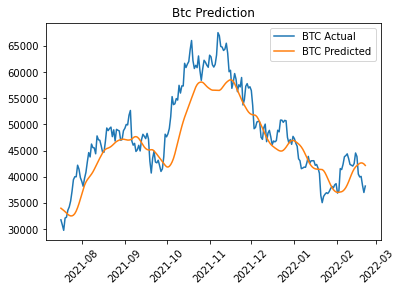

In [93]:
# Plot the real vs predicted prices as a line chart

bitcoin.plot(title="Btc Prediction", rot=45);

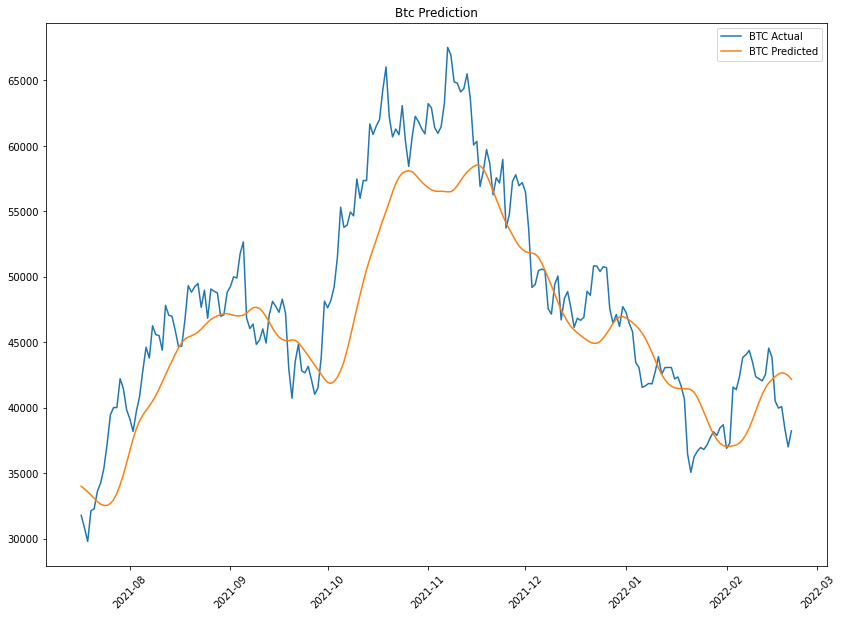

In [94]:
bitcoin.plot(figsize=(14, 10), title='Btc Prediction', rot=45);

In [95]:
#------------------------------------------------------NOW WHAT?????????????????????

In [96]:
# our prediction variables

In [97]:
bitcoin 

BTC Actual  BTC Predicted
2021-07-17  31789.203571   34014.113281
2021-07-18  30841.410794   33808.078125
2021-07-19  29793.295421   33589.855469
2021-07-20  32143.155562   33354.210938
2021-07-21  32290.634066   33084.445312
...                  ...            ...
2022-02-17  39981.937395   42583.164062
2022-02-18  40089.154019   42671.691406
2022-02-19  38391.565453   42629.117188
2022-02-20  37017.579074   42469.253906
2022-02-21  38242.353621   42179.753906

[220 rows x 2 columns]

In [98]:
ethereum

ETH Actual  ETH Predicted
2021-07-17  1891.464803    2158.847900
2021-07-18  1818.694676    2128.901611
2021-07-19  1786.324923    2102.435303
2021-07-20  1995.530504    2077.974365
2021-07-21  2024.617184    2054.738770
...                 ...            ...
2022-02-17  2779.744310    2814.099609
2022-02-18  2764.041273    2804.781494
2022-02-19  2622.361412    2788.291260
2022-02-20  2568.779103    2765.031250
2022-02-21  2637.120761    2732.206543

[220 rows x 2 columns]

In [99]:
gold

Gold Actual  Gold Predicted
2021-07-23   168.160004      169.916183
2021-07-26   168.440002      170.022400
2021-07-27   169.289993      170.044144
2021-07-28   171.169998      170.000076
2021-07-29   169.820007      169.925842
...                 ...             ...
2022-02-14   173.080002      169.676819
2022-02-15   174.860001      169.986908
2022-02-16   177.250000      170.379166
2022-02-17   177.119995      170.850754
2022-02-18   177.490005      171.425018

[147 rows x 2 columns]

In [100]:
stocks

SPY Actual  SPY Predicted
2021-07-23  438.072571     434.290894
2021-07-26  436.076019     434.614838
2021-07-27  435.897217     434.986816
2021-07-28  437.705048     435.394867
2021-07-29  435.579346     435.831329
...                ...            ...
2022-02-14  446.100006     451.830933
2022-02-15  446.600006     451.675903
2022-02-16  437.059998     451.505371
2022-02-17  434.230011     451.338501
2022-02-18  429.570007     451.102600

[147 rows x 2 columns]

In [101]:
combined_predictions = pd.concat([bitcoin, ethereum, gold, stocks], axis=1, join="inner")

In [102]:
combined_predictions

BTC Actual  BTC Predicted  ...  SPY Actual  SPY Predicted
2021-07-23  34263.721592   32644.261719  ...  438.072571     434.290894
2021-07-26  39466.326707   32693.730469  ...  436.076019     434.614838
2021-07-27  40022.237595   32989.046875  ...  435.897217     434.986816
2021-07-28  40021.289821   33470.367188  ...  437.705048     435.394867
2021-07-29  42225.297589   34123.332031  ...  435.579346     435.831329
...                  ...            ...  ...         ...            ...
2022-02-14  44556.618133   41896.019531  ...  446.100006     451.830933
2022-02-15  43881.746655   42162.343750  ...  446.600006     451.675903
2022-02-16  40526.510616   42388.207031  ...  437.059998     451.505371
2022-02-17  39981.937395   42583.164062  ...  434.230011     451.338501
2022-02-18  40089.154019   42671.691406  ...  429.570007     451.102600

[147 rows x 8 columns]

In [103]:
# shift the predicted column
stocks['SPY Compare Prediction'] = stocks['SPY Predicted'].shift(1)
stocks.dropna(inplace=True)
stocks



SPY Actual  SPY Predicted  SPY Compare Prediction
2021-07-26  436.076019     434.614838              434.290894
2021-07-27  435.897217     434.986816              434.614838
2021-07-28  437.705048     435.394867              434.986816
2021-07-29  435.579346     435.831329              435.394867
2021-07-30  434.665497     436.301300              435.831329
...                ...            ...                     ...
2022-02-14  446.100006     451.830933              451.943909
2022-02-15  446.600006     451.675903              451.830933
2022-02-16  437.059998     451.505371              451.675903
2022-02-17  434.230011     451.338501              451.505371
2022-02-18  429.570007     451.102600              451.338501

[146 rows x 3 columns]

In [104]:
SPY_actual_vs_compared = stocks['SPY Actual'] - stocks['SPY Compare Prediction']
SPY_actual_vs_compared

2021-07-26     1.785125
2021-07-27     1.282379
2021-07-28     2.718232
2021-07-29     0.184479
2021-07-30    -1.165832
                ...    
2022-02-14    -5.843903
2022-02-15    -5.230927
2022-02-16   -14.615905
2022-02-17   -17.275360
2022-02-18   -21.768494
Length: 146, dtype: float64

In [105]:
SPY_actual_vs_compared.sum()

-310.2316026972663

In [106]:
#------BTC

In [107]:
bitcoin['BTC Compare Prediction'] = bitcoin['BTC Predicted'].shift(1)
bitcoin.dropna(inplace=True)
bitcoin

BTC Actual  BTC Predicted  BTC Compare Prediction
2021-07-18  30841.410794   33808.078125            34014.113281
2021-07-19  29793.295421   33589.855469            33808.078125
2021-07-20  32143.155562   33354.210938            33589.855469
2021-07-21  32290.634066   33084.445312            33354.210938
2021-07-22  33637.130024   32838.156250            33084.445312
...                  ...            ...                     ...
2022-02-17  39981.937395   42583.164062            42388.207031
2022-02-18  40089.154019   42671.691406            42583.164062
2022-02-19  38391.565453   42629.117188            42671.691406
2022-02-20  37017.579074   42469.253906            42629.117188
2022-02-21  38242.353621   42179.753906            42469.253906

[219 rows x 3 columns]

In [108]:
BTC_actual_vs_compared = bitcoin['BTC Actual'] - bitcoin['BTC Compare Prediction']
BTC_actual_vs_compared

2021-07-18   -3172.702487
2021-07-19   -4014.782704
2021-07-20   -1446.699906
2021-07-21   -1063.576872
2021-07-22     552.684712
                 ...     
2022-02-17   -2406.269636
2022-02-18   -2494.010043
2022-02-19   -4280.125953
2022-02-20   -5611.538113
2022-02-21   -4226.900285
Length: 219, dtype: float64

In [109]:
BTC_actual_vs_compared.sum()

505415.750250412

In [110]:
#-------Gold

In [111]:
gold['Gold Compare Prediction'] = gold['Gold Predicted'].shift(1)
gold.dropna(inplace=True)
gold

Gold Actual  Gold Predicted  Gold Compare Prediction
2021-07-26   168.440002      170.022400               169.916183
2021-07-27   169.289993      170.044144               170.022400
2021-07-28   171.169998      170.000076               170.044144
2021-07-29   169.820007      169.925842               170.000076
2021-07-30   169.610001      169.880920               169.925842
...                 ...             ...                      ...
2022-02-14   173.080002      169.676819               169.503220
2022-02-15   174.860001      169.986908               169.676819
2022-02-16   177.250000      170.379166               169.986908
2022-02-17   177.119995      170.850754               170.379166
2022-02-18   177.490005      171.425018               170.850754

[146 rows x 3 columns]

In [112]:
Gold_actual_vs_compared = gold['Gold Actual'] - gold['Gold Compare Prediction']
Gold_actual_vs_compared

2021-07-26   -1.476181
2021-07-27   -0.732407
2021-07-28    1.125854
2021-07-29   -0.180069
2021-07-30   -0.315841
                ...   
2022-02-14    3.576782
2022-02-15    5.183182
2022-02-16    7.263092
2022-02-17    6.740829
2022-02-18    6.639251
Length: 146, dtype: float64

In [113]:
Gold_actual_vs_compared.sum()

-47.50914521093745

In [114]:
#---------------------eth

In [115]:
ethereum['ETH Compare Prediction'] = ethereum['ETH Predicted'].shift(1)
ethereum.dropna(inplace=True)
ethereum

ETH Actual  ETH Predicted  ETH Compare Prediction
2021-07-18  1818.694676    2128.901611             2158.847900
2021-07-19  1786.324923    2102.435303             2128.901611
2021-07-20  1995.530504    2077.974365             2102.435303
2021-07-21  2024.617184    2054.738770             2077.974365
2021-07-22  2124.504550    2040.313477             2054.738770
...                 ...            ...                     ...
2022-02-17  2779.744310    2814.099609             2822.854004
2022-02-18  2764.041273    2804.781494             2814.099609
2022-02-19  2622.361412    2788.291260             2804.781494
2022-02-20  2568.779103    2765.031250             2788.291260
2022-02-21  2637.120761    2732.206543             2765.031250

[219 rows x 3 columns]

In [116]:
ETH_actual_vs_compared = ethereum['ETH Actual'] - ethereum['ETH Compare Prediction']
ETH_actual_vs_compared

2021-07-18   -340.153224
2021-07-19   -342.576688
2021-07-20   -106.904798
2021-07-21    -53.357181
2021-07-22     69.765781
                 ...    
2022-02-17    -43.109694
2022-02-18    -50.058337
2022-02-19   -182.420082
2022-02-20   -219.512156
2022-02-21   -127.910489
Length: 219, dtype: float64

In [117]:
ETH_actual_vs_compared.sum()

108904.55105076043

In [118]:
#---------------------------

In [119]:
scaler = preprocessing.MinMaxScaler()
names = combined_predictions.columns
d = scaler.fit_transform(combined_predictions)
scaled_combined_predictions = pd.DataFrame(d, columns=names)
scaled_combined_predictions.head()

BTC Actual  BTC Predicted  ...  SPY Actual  SPY Predicted
0    0.000000       0.000000  ...    0.216197       0.000000
1    0.159205       0.001910  ...    0.176716       0.008855
2    0.176216       0.013311  ...    0.173180       0.019023
3    0.176187       0.031894  ...    0.208929       0.030177
4    0.243632       0.057104  ...    0.166895       0.042107

[5 rows x 8 columns]

In [120]:
correlation = scaled_combined_predictions.corr()
correlation


BTC Actual  BTC Predicted  ...  SPY Actual  SPY Predicted
BTC Actual        1.000000       0.889426  ...    0.372712      -0.111008
BTC Predicted     0.889426       1.000000  ...    0.505331       0.131894
ETH Actual        0.880846       0.882787  ...    0.643246       0.240754
ETH Predicted     0.776784       0.917984  ...    0.583017       0.292843
Gold Actual      -0.057485       0.018296  ...    0.228599       0.264141
Gold Predicted   -0.279840      -0.122895  ...    0.150209       0.405800
SPY Actual        0.372712       0.505331  ...    1.000000       0.628667
SPY Predicted    -0.111008       0.131894  ...    0.628667       1.000000

[8 rows x 8 columns]

In [121]:

scaled_needed_predictions = scaled_combined_predictions[['BTC Predicted', 'Gold Predicted', 'SPY Predicted']].copy()
scaled_needed_predictions


BTC Predicted  Gold Predicted  SPY Predicted
0         0.000000        0.629065       0.000000
1         0.001910        0.642018       0.008855
2         0.013311        0.644669       0.019023
3         0.031894        0.639295       0.030177
4         0.057104        0.630243       0.042107
..             ...             ...            ...
142       0.357190        0.599876       0.479453
143       0.367472        0.637690       0.475215
144       0.376192        0.685523       0.470554
145       0.383719        0.743031       0.465993
146       0.387137        0.813059       0.459544

[147 rows x 3 columns]

In [122]:
correlation_needed = scaled_needed_predictions.corr()
correlation_needed

BTC Predicted  Gold Predicted  SPY Predicted
BTC Predicted        1.000000       -0.122895       0.131894
Gold Predicted      -0.122895        1.000000       0.405800
SPY Predicted        0.131894        0.405800       1.000000

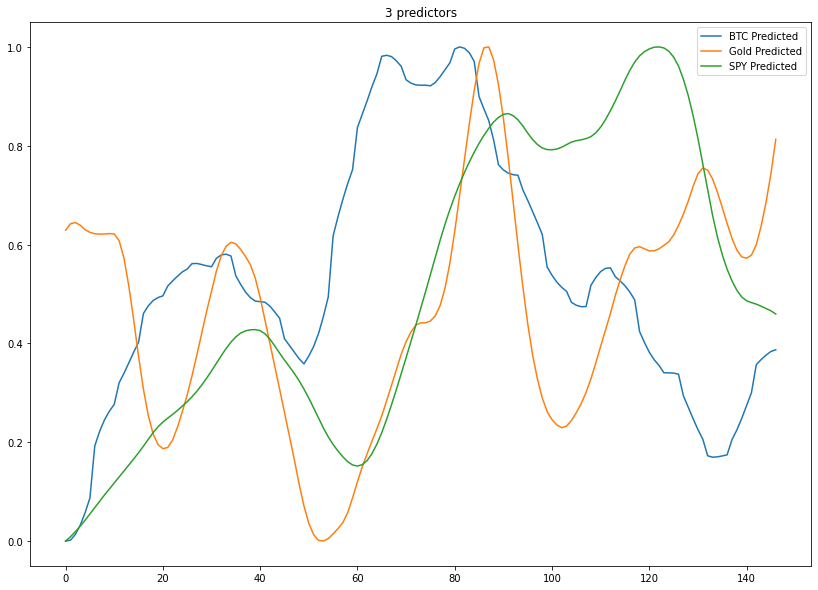

In [123]:
scaled_needed_predictions.plot(figsize=(14, 10), title='3 predictors')

In [124]:
scaled_needed_predictions_plus_ETH = scaled_combined_predictions[['BTC Predicted', 'Gold Predicted', 'SPY Predicted', 'ETH Predicted']].copy()
scaled_needed_predictions_plus_ETH

BTC Predicted  Gold Predicted  SPY Predicted  ETH Predicted
0         0.000000        0.629065       0.000000       0.000000
1         0.001910        0.642018       0.008855       0.041478
2         0.013311        0.644669       0.019023       0.066068
3         0.031894        0.639295       0.030177       0.093520
4         0.057104        0.630243       0.042107       0.121440
..             ...             ...            ...            ...
142       0.357190        0.599876       0.479453       0.548392
143       0.367472        0.637690       0.475215       0.528488
144       0.376192        0.685523       0.470554       0.515544
145       0.383719        0.743031       0.465993       0.509803
146       0.387137        0.813059       0.459544       0.503692

[147 rows x 4 columns]

In [125]:
four_corr = scaled_needed_predictions_plus_ETH.corr()

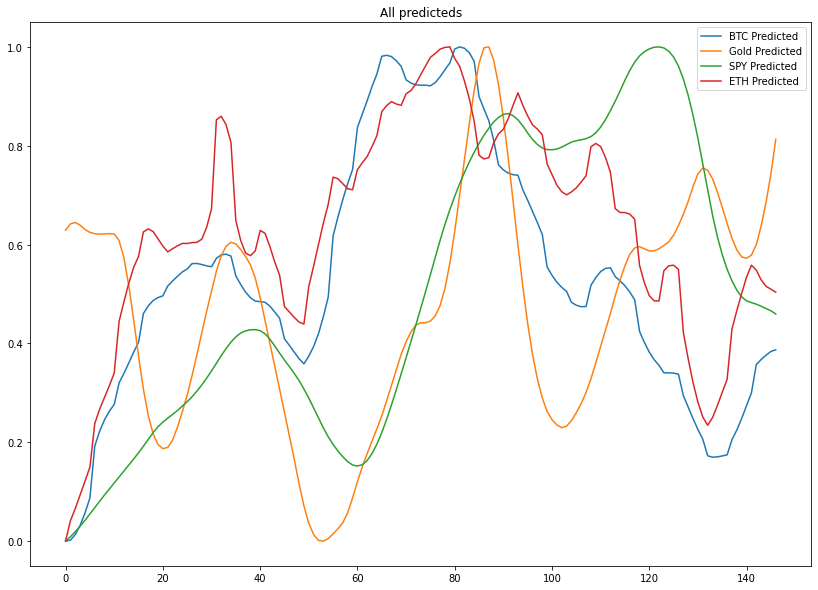

In [126]:
scaled_needed_predictions_plus_ETH.plot(figsize=(14, 10), title='All predicteds')

In [127]:
stocks.head()

SPY Actual  SPY Predicted  SPY Compare Prediction
2021-07-26  436.076019     434.614838              434.290894
2021-07-27  435.897217     434.986816              434.614838
2021-07-28  437.705048     435.394867              434.986816
2021-07-29  435.579346     435.831329              435.394867
2021-07-30  434.665497     436.301300              435.831329

In [128]:
gold.head()

Gold Actual  Gold Predicted  Gold Compare Prediction
2021-07-26   168.440002      170.022400               169.916183
2021-07-27   169.289993      170.044144               170.022400
2021-07-28   171.169998      170.000076               170.044144
2021-07-29   169.820007      169.925842               170.000076
2021-07-30   169.610001      169.880920               169.925842

In [129]:
bitcoin.head()

BTC Actual  BTC Predicted  BTC Compare Prediction
2021-07-18  30841.410794   33808.078125            34014.113281
2021-07-19  29793.295421   33589.855469            33808.078125
2021-07-20  32143.155562   33354.210938            33589.855469
2021-07-21  32290.634066   33084.445312            33354.210938
2021-07-22  33637.130024   32838.156250            33084.445312

In [130]:
ethereum.head()

ETH Actual  ETH Predicted  ETH Compare Prediction
2021-07-18  1818.694676    2128.901611             2158.847900
2021-07-19  1786.324923    2102.435303             2128.901611
2021-07-20  1995.530504    2077.974365             2102.435303
2021-07-21  2024.617184    2054.738770             2077.974365
2021-07-22  2124.504550    2040.313477             2054.738770

In [131]:
from sklearn.metrics import mean_absolute_percentage_error
y_true = stocks["SPY Actual"]
y_pred = stocks["SPY Predicted"]
mean_absolute_percentage_error(y_true, y_pred)

0.018266550405756456

In [132]:
from sklearn.metrics import mean_absolute_percentage_error
y_true = gold["Gold Actual"]
y_pred = gold["Gold Predicted"]
mean_absolute_percentage_error(y_true, y_pred)

0.013600595626704728

In [133]:
from sklearn.metrics import mean_absolute_percentage_error
y_true = bitcoin["BTC Actual"]
y_pred = bitcoin["BTC Predicted"]
mean_absolute_percentage_error(y_true, y_pred)

0.06876539142991346

In [134]:
from sklearn.metrics import mean_absolute_percentage_error
y_true = ethereum["ETH Actual"]
y_pred = ethereum["ETH Predicted"]
mean_absolute_percentage_error(y_true, y_pred)

0.14052277105464317

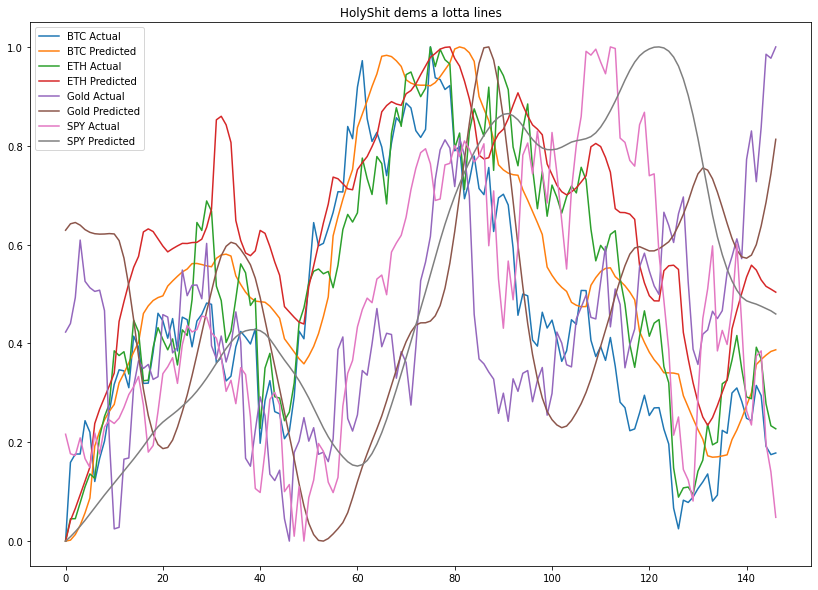

In [135]:
scaled_combined_predictions.plot(figsize=(14, 10), title='HolyShit dems a lotta lines')

In [136]:
scaled_combined_predictions

BTC Actual  BTC Predicted  ...  SPY Actual  SPY Predicted
0      0.000000       0.000000  ...    0.216197       0.000000
1      0.159205       0.001910  ...    0.176716       0.008855
2      0.176216       0.013311  ...    0.173180       0.019023
3      0.176187       0.031894  ...    0.208929       0.030177
4      0.243632       0.057104  ...    0.166895       0.042107
..          ...            ...  ...         ...            ...
142    0.314973       0.357190  ...    0.374934       0.479453
143    0.294321       0.367472  ...    0.384821       0.475215
144    0.191648       0.376192  ...    0.196174       0.470554
145    0.174983       0.383719  ...    0.140213       0.465993
146    0.178264       0.387137  ...    0.048064       0.459544

[147 rows x 8 columns]

In [137]:
andrei_spygld_btc_pred = scaled_combined_predictions[['BTC Actual', 'Gold Predicted', 'SPY Predicted']].copy()
andrei_spygld_btc_pred

BTC Actual  Gold Predicted  SPY Predicted
0      0.000000        0.629065       0.000000
1      0.159205        0.642018       0.008855
2      0.176216        0.644669       0.019023
3      0.176187        0.639295       0.030177
4      0.243632        0.630243       0.042107
..          ...             ...            ...
142    0.314973        0.599876       0.479453
143    0.294321        0.637690       0.475215
144    0.191648        0.685523       0.470554
145    0.174983        0.743031       0.465993
146    0.178264        0.813059       0.459544

[147 rows x 3 columns]

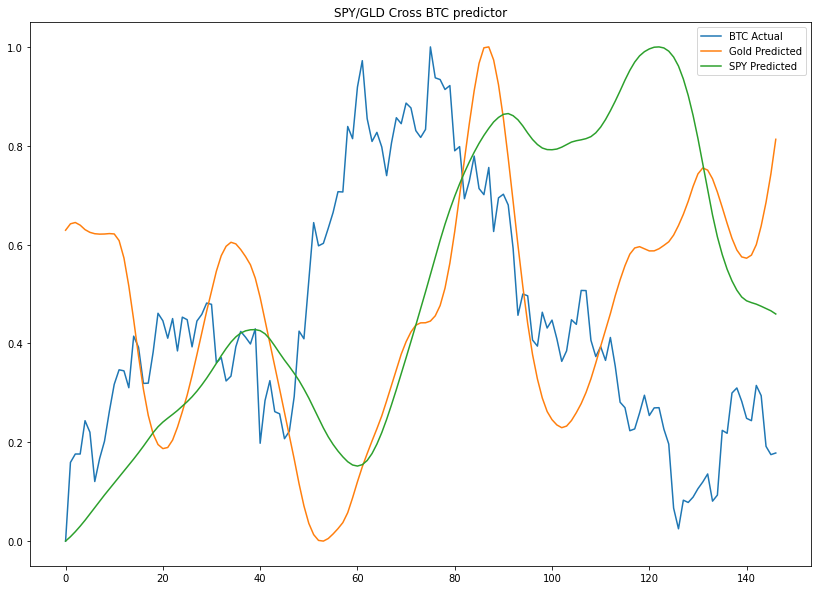

In [138]:
andrei_spygld_btc_pred.plot(figsize=(14, 10), title='SPY/GLD Cross BTC predictor')